In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('F:\ML\Datasets\matches.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.6+ KB


In [4]:
data


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,5/22/2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,5/24/2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,5/25/2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,5/27/2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [5]:
#7 Most Played venue in the History of IPL from 2008 to 2017¶
data['venue'].value_counts().head(7)


M Chinnaswamy Stadium                         66
Eden Gardens                                  61
Feroz Shah Kotla                              60
Wankhede Stadium                              57
Rajiv Gandhi International Stadium, Uppal     49
MA Chidambaram Stadium, Chepauk               48
Punjab Cricket Association Stadium, Mohali    35
Name: venue, dtype: int64

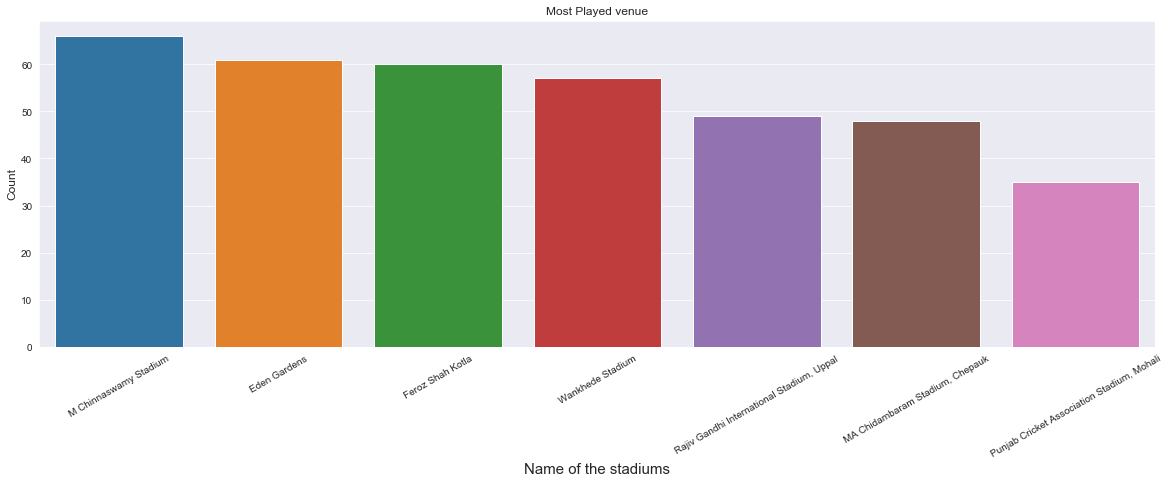

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")# to make background with grid
ls=data['venue'].value_counts().sort_values(ascending=False)
ls=ls[:7]
plt.figure(figsize=(20,6))
Most_Played =sns.barplot(ls.index, ls.values)

plt.title('Most Played venue')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the stadiums', fontsize=15)
Most_Played.set_xticklabels(rotation=30,labels=ls.index,fontsize=10)
plt.show()


In [7]:
#Delhi_stadium=df1.loc[(df1['venue']=='Feroz Shah Kotla') ]
#how many matches won by wickets and won by runs when playing in Feroz Shah Kotla?

newdata = data[data['venue'].str.contains('Feroz Shah Kotla', case=False, regex=True,na=False)]
newdata['win_by_runs'].nunique()

24

In [8]:
newdata = data[data['venue'].str.contains('Feroz Shah Kotla', case=False, regex=True,na=False)]
newdata['win_by_wickets'].nunique()

9

In [9]:
Delhi_stadium=data.loc[(data['venue']=='Feroz Shah Kotla') ]

Delhi_stadium_win_by_runs=Delhi_stadium[Delhi_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Delhi_stadium_win_by_runs),len(Delhi_stadium)-len(Delhi_stadium_win_by_runs)] #aftersubtracting bat from total gives ball
slices

[28, 32]

In [10]:
Delhi_stadium.result.value_counts()

normal       59
no result     1
Name: result, dtype: int64

In [11]:
labels=['Batting first','Batting Second']


([<matplotlib.patches.Wedge at 0x1ea8a482f88>,
 [Text(-1.0939740856227893, 0.1149813027660692, 'Batting first'),
  Text(1.4917828587110604, -0.15679254591930333, 'Batting Second')],
 [Text(-0.5967131376124304, 0.06271707423603774, '46.67%'),
  Text(0.9945219058073735, -0.10452836394620221, '53.33%')])

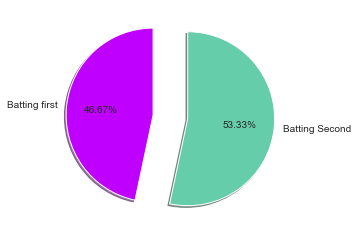

In [12]:
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#bf00ff','#66CDAA'])


In [13]:
#how many matches won by wickets and won by runs when playing in Chinnaswamy Stadium?

chinnaswamy_stadium=data.loc[(data['venue']=='Chinnaswamy Stadium') ]

chinnaswamy_stadium_win_by_runs=chinnaswamy_stadium[chinnaswamy_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
sliceschin=[len(chinnaswamy_stadium_win_by_runs),len(chinnaswamy_stadium)-len(chinnaswamy_stadium_win_by_runs)] #aftersubtracting bat from total gives ball
sliceschin

[0, 0]

([<matplotlib.patches.Wedge at 0x1ea8a5039c8>,
 [Text(6.735557395310444e-17, 1.1, 'Batting first'),
  Text(9.184850993605151e-17, 1.5, 'Batting Second')],
 [Text(3.6739403974420595e-17, 0.6, '0.00%'),
  Text(6.123233995736766e-17, 1.0, '0.00%')])

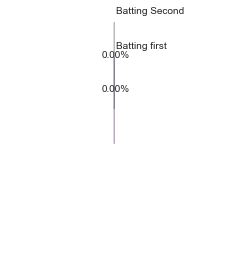

In [14]:
labelchinsw=['Batting first','Batting Second']
plt.pie(sliceschin,labels=labelchinsw,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#bf00ff','#66CDAA'])


In [15]:
# #how many matches won by wickets and won by runs when playing in Wankhede Stadium?
wankhede_stadium=data.loc[(data['venue']=='Wankhede Stadium') ]

wankhede_stadium_win_by_runs=wankhede_stadium[wankhede_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
sliceswankhede=[len(wankhede_stadium_win_by_runs),len(wankhede_stadium)-len(wankhede_stadium_win_by_runs)] #aftersubtracting bat from total gives ball
sliceswankhede

[29, 28]

([<matplotlib.patches.Wedge at 0x1ea8a555f08>,
 [Text(-1.0995823352381393, -0.030309866912283573, 'Batting first'),
  Text(1.4994304532731637, 0.041331777085379884, 'Batting Second')],
 [Text(-0.5997721828571668, -0.0165326546794274, '50.88%'),
  Text(0.999620302182109, 0.02755451805691992, '49.12%')])

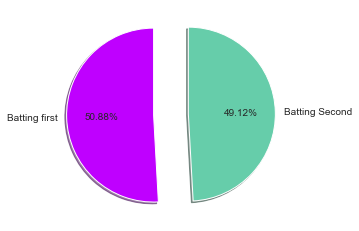

In [16]:
labelwankhede=['Batting first','Batting Second']
plt.pie(sliceswankhede,labels=labelwankhede,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#bf00ff','#66CDAA'])


In [17]:
# #how many matches won by wickets and won by runs when playing in Eden Gardens?

eden_stadium=data.loc[(data['venue']=='Eden Gardens') ]

eden_stadium_win_by_runs=eden_stadium[eden_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
sliceseden=[len(eden_stadium_win_by_runs),len(eden_stadium)-len(eden_stadium_win_by_runs)] #aftersubtracting bat from total gives ball
sliceseden

[25, 36]

([<matplotlib.patches.Wedge at 0x1ea8a5ab988>,
 [Text(-1.4402247950643852, 0.41922850533062544, 'Batting first'),
  Text(1.0561648497138825, -0.3074342372424588, 'Batting Second')],
 [Text(-0.9601498633762566, 0.2794856702204169, '40.9836%'),
  Text(0.5760899180257539, -0.16769140213225023, '59.0164%')])

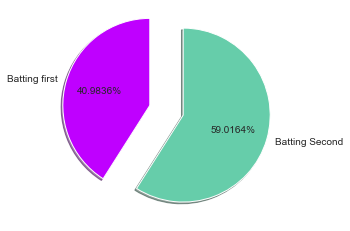

In [18]:
labeleden=['Batting first','Batting Second']
plt.pie(sliceseden,labels=labeleden,startangle=90,shadow=1,explode=(0.4,0),autopct='%1.4f%%',colors=['#bf00ff','#66CDAA'])


In [19]:
# #how many matches won by wickets and won by runs when playing in Eden Gardens?

rajiv_stadium=data.loc[(data['venue']=='Rajiv Gandhi International Stadium, Uppal') ]

rajiv_stadium_win_by_runs=rajiv_stadium[rajiv_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slicesrajiv=[len(rajiv_stadium_win_by_runs),len(eden_stadium)-len(rajiv_stadium_win_by_runs)] #aftersubtracting bat from total gives ball
slicesrajiv
# slicesrajiv give rajiv_stadium_win_byruns total count and win_by_wickets count

[20, 41]

([<matplotlib.patches.Wedge at 0x1ea8a603508>,
 [Text(-0.9430460847999075, 0.5662720917929523, 'Batting first'),
  Text(1.2859718615204783, -0.7721893364826764, 'Batting Second')],
 [Text(-0.5143887735272222, 0.3088756864325194, '32.79%'),
  Text(0.8573145743469854, -0.5147928909884509, '67.21%')])

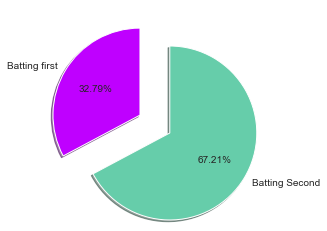

In [20]:
labelrajiv=['Batting first','Batting Second']
plt.pie(slicesrajiv,labels=labelrajiv,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#bf00ff','#66CDAA'])


In [21]:
len(eden_stadium['win_by_runs'])

61

In [23]:
toss_winner=data[data['toss_winner']==data['winner']]
toss_winner.count()['id']


325

([<matplotlib.patches.Wedge at 0x1ea8a6ae688>,
 [Text(-1.0685728908766525, -0.2610593359439841, 'yes'),
  Text(1.4571448511954352, 0.3559900035599788, 'no')],
 [Text(-0.582857940478174, -0.1423960014239913, '57.63%'),
  Text(0.9714299007969567, 0.23732666903998584, '42.37%')])

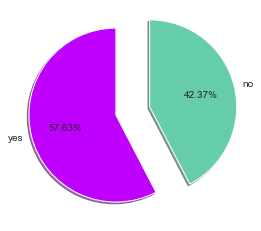

In [25]:
match_2017=data[data['season']==2017]
df=match_2017[match_2017['toss_winner']==match_2017['winner']]
slices=[len(df),(59-len(df))] # total matches played in 2017 is 59
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#bf00ff','#66CDAA'])


In [27]:
data['id'].max()

636

In [33]:
data['season'].nunique() # gives count


10

In [36]:
dmax=data['win_by_runs'].max()
data[data['win_by_runs']==dmax ]['winner']

43    Mumbai Indians
Name: winner, dtype: object

In [39]:
data.iloc[data["win_by_runs"].idxmax()]
# idxmax 

id                               44
season                         2017
city                          Delhi
date                       5/6/2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [42]:
data[data.win_by_runs == data.win_by_runs.max()]


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,5/6/2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


In [44]:
data.iloc[data["win_by_wickets"].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                             4/7/2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [46]:
dmax=data['win_by_wickets'].max()
data[data['win_by_wickets']==dmax ]['winner']

2            Kolkata Knight Riders
34                 Kings XI Punjab
71                 Deccan Chargers
119               Delhi Daredevils
183    Royal Challengers Bangalore
298               Rajasthan Royals
376                 Mumbai Indians
390            Chennai Super Kings
542    Royal Challengers Bangalore
590            Sunrisers Hyderabad
Name: winner, dtype: object

In [47]:
data.iloc[data["win_by_wickets"].idxmax()]['winner']


'Kolkata Knight Riders'

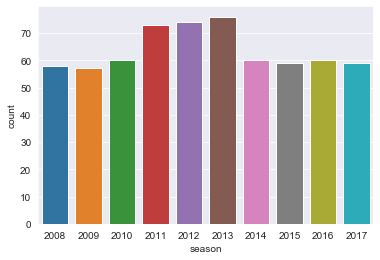

In [50]:
import seaborn as sns
#iplseasonmaxcount=data['season'].value_counts()[0:1]
sns.countplot(x='season',data=data)

In [52]:
iplseasonmaxcount=data['season'].value_counts()[0:1]
iplseasonmaxcount

2013    76
Name: season, dtype: int64

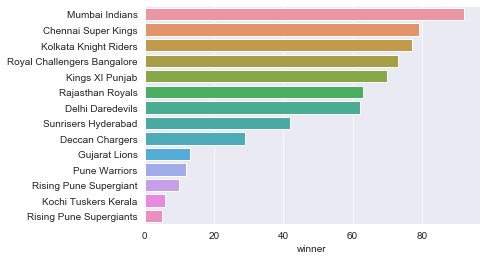

In [59]:
datanew = data.winner.value_counts()
sns.barplot(y = datanew.index,x = datanew, orient = "h")


In [61]:
data['winner']['player_of_match'].head()

KeyError: 'player_of_match'

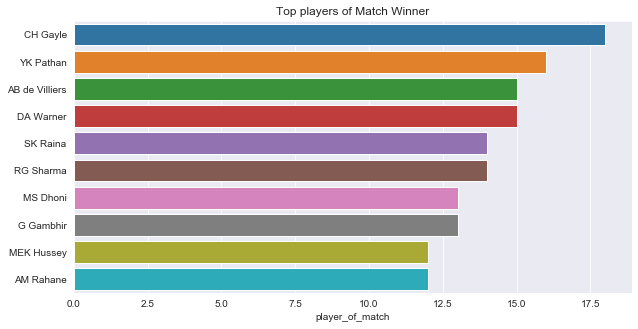

In [67]:
import matplotlib.pyplot as plt
top_player=data['player_of_match'].value_counts()[0:10]
plt.figure(figsize=(10,5))
sns.barplot(y=top_player.index,x=top_player,orient="h")
plt.title("Top players of Match Winner")
plt.show()
# top_playes of matches

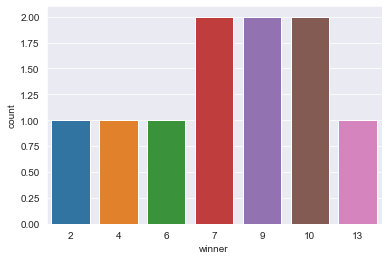

In [79]:
datawin_season=data.groupby('season')['winner'].value_counts()[0:10]
# groupby is applied on category like with season and winner
sns.countplot(x=datawin_season , data=data)
plt.show()
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

In [75]:
data["date"]=pd.to_datetime(data["date"])
data["date"].dtype # convert object into datetime

dtype('<M8[ns]')

In [80]:
data["month"]=data["date"].dt.month
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,month
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,4
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,4
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,4
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,4


In [84]:
datawin_seasonnew=data.groupby('season')['winner'].value_counts()[0:10]
# groupby is applied on category like with season and winner

sns.jointplot(data=datawin_seasonnew,kind='reg')

TypeError: jointplot() missing 2 required positional arguments: 'x' and 'y'

In [102]:
# most played umpire1- A Nand Kishore umpire2 -  S Ravi
#data['umpire1'].value_counts
# which team won under umpiring of upire1 A Nand Kishore
#most successful player of match under umpire s ravi
data[data['umpire1']=='S Ravi']['player_of_match'].value_counts().idxmax()


'A Mishra'

In [127]:
#data.groupby('umpire1')['winner'].value_counts().idxmax() # most played winning umpire1 #hpk dharmsena with mumbai indians
#data.groupby('umpire2')['winner'].value_counts().idxmax() # SJA Taufel CSk

data.groupby('player_of_match')['umpire2'].value_counts().idxmax()


[('AM Rahane', 'RJ Tucker')]